In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\hp\Desktop\CVT\Datasets-master\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
data.shape

(768, 9)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

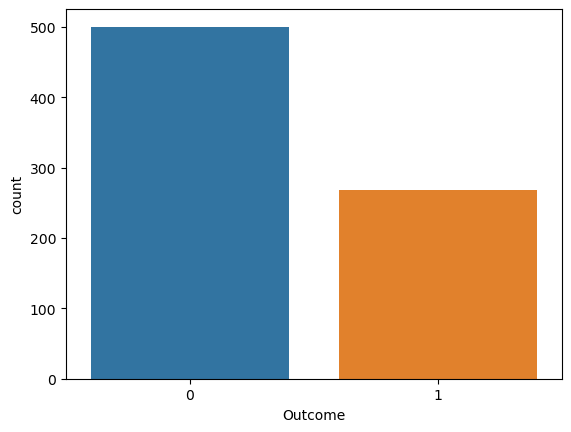

In [5]:
import seaborn as sns
sns.countplot(data['Outcome'])

In [6]:
#!pip install imblearn
import imblearn

In [7]:
#Input and Output
X = data.drop('Outcome',axis = 1)
y = data['Outcome']

### Undersampling 1 - Random

In [8]:
from imblearn.under_sampling import RandomUnderSampler

In [9]:
rs = RandomUnderSampler()

In [10]:
X_res,y_res = rs.fit_resample(X,y)

In [11]:
y_res.value_counts()

0    268
1    268
Name: Outcome, dtype: int64

### Undersampling 2 - Centroid

In [12]:
from imblearn.under_sampling import ClusterCentroids

In [13]:
cc = ClusterCentroids()

In [14]:
X_res,y_res = cc.fit_resample(X,y)

In [15]:
y_res.value_counts()

0    268
1    268
Name: Outcome, dtype: int64

### Undersampling 3 - ENN(Edited Nearest Neigherbour) 

In [17]:
from imblearn.under_sampling import EditedNearestNeighbours

In [18]:
ENN = EditedNearestNeighbours()

In [19]:
X_res,y_res = ENN.fit_resample(X,y)

In [20]:
y_res.value_counts()

1    268
0    240
Name: Outcome, dtype: int64

### Oversampling/Upsampling 1 : Random

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
ROS = RandomOverSampler()

In [24]:
X_res,y_res = ROS.fit_resample(X,y)

In [25]:
y_res.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

### Oversampling 2 : SMOTE(Synthetic Minority Oversampling Technique)

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
smote = SMOTE()

In [28]:
X_res,y_res = smote.fit_resample(X,y)

In [29]:
y_res.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

### Combination of both Undersampling and Oversampling:

In [31]:
from imblearn.combine import SMOTEENN

In [32]:
smoteenn = SMOTEENN()

In [33]:
X_res,y_res = smoteenn.fit_resample(X,y)

In [34]:
y_res.value_counts()

1    290
0    222
Name: Outcome, dtype: int64

### Ensemble Method : EasyEnsembleClassifier

In [35]:
from imblearn.ensemble import EasyEnsembleClassifier

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=10)

In [38]:
eec = EasyEnsembleClassifier(random_state = 40)

In [39]:
eec.fit(X_train,y_train)

EasyEnsembleClassifier(random_state=40)

In [40]:
y_pred = eec.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        95
           1       0.65      0.76      0.70        59

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.77      0.75      0.76       154



In [47]:
confusion_matrix(y_test,y_pred)

array([[71, 24],
       [14, 45]], dtype=int64)